In [2]:
#SOME GRAPH VISUALIZATION MAY REPEAT AS DONE BY MANY GROUP MEMBERS AND THEN COMBINED. SORRY!


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df = pd.read_csv('./CleanedProjectDataset.csv')

In [3]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,everyone,ART_&_DESIGN,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,everyone,ART_&_DESIGN;PRETEND_PLAY,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


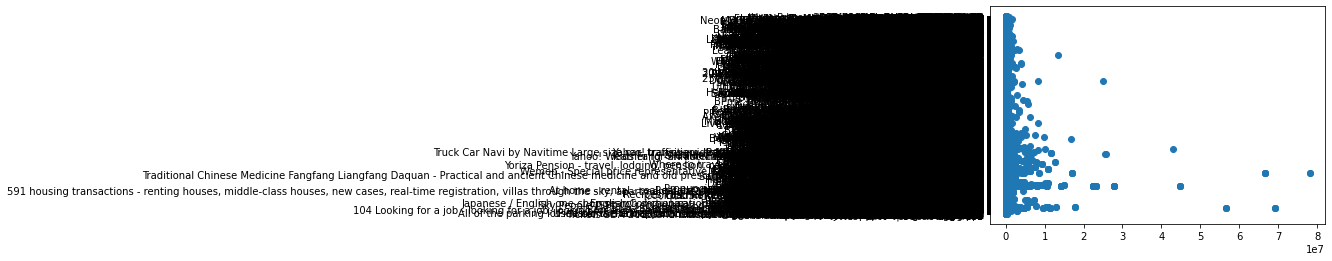

In [11]:
plt.scatter(x=df['Reviews'],y = df['App'])
plt.show()

In [5]:
sorted(df)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Rating      4.000000e-01
Reviews     5.477700e+04
Size        3.014750e+01
Installs    4.995000e+06
Price       0.000000e+00
dtype: float64


In [19]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

       Android_Ver    App  Category  Content_Rating  Current_Ver  Genres  \
0            False  False     False           False        False   False   
1            False  False     False           False        False   False   
4            False  False     False           False        False   False   
5            False  False     False           False        False   False   
6            False  False     False           False        False   False   
...            ...    ...       ...             ...          ...     ...   
10823        False  False     False           False        False   False   
10824        False  False     False           False        False   False   
10825        False  False     False           False        False   False   
10826        False  False     False           False        False   False   
10827        False  False     False           False        False   False   

       Installs  Last_Updated  Price  Rating  Reviews   Size   Type  
0         False  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [20]:
df_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleared_iqr
df_cleared_iqr.shape

df.shape


(6919, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6919 entries, 0 to 10827
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6919 non-null   object 
 1   Category        6919 non-null   object 
 2   Rating          6919 non-null   float64
 3   Reviews         6919 non-null   int64  
 4   Size            6919 non-null   float64
 5   Installs        6919 non-null   int64  
 6   Type            6919 non-null   object 
 7   Price           6919 non-null   float64
 8   Content_Rating  6919 non-null   object 
 9   Genres          6919 non-null   object 
 10  Last_Updated    6919 non-null   object 
 11  Current_Ver     6919 non-null   object 
 12  Android_Ver     6919 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 756.8+ KB


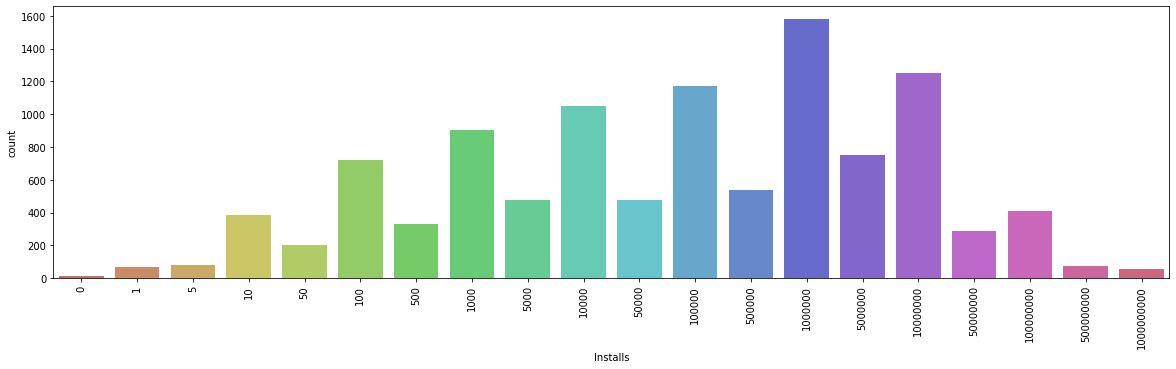

In [28]:

# DATA VISUALISATION


plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

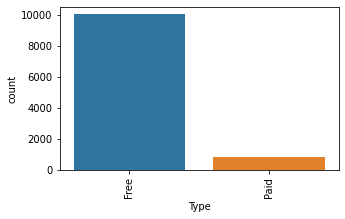

In [29]:
plt.figure(figsize=(5,3))
fig = sns.countplot(x=df['Type'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

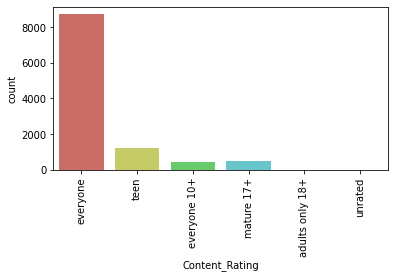

In [31]:
plt.figure(figsize=(6,3))
fig = sns.countplot(x=df['Content_Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

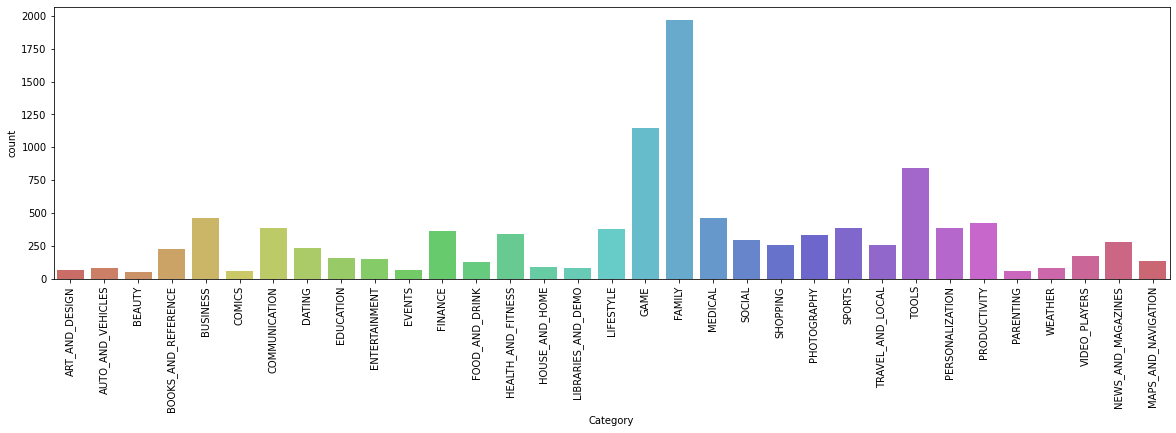

In [32]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

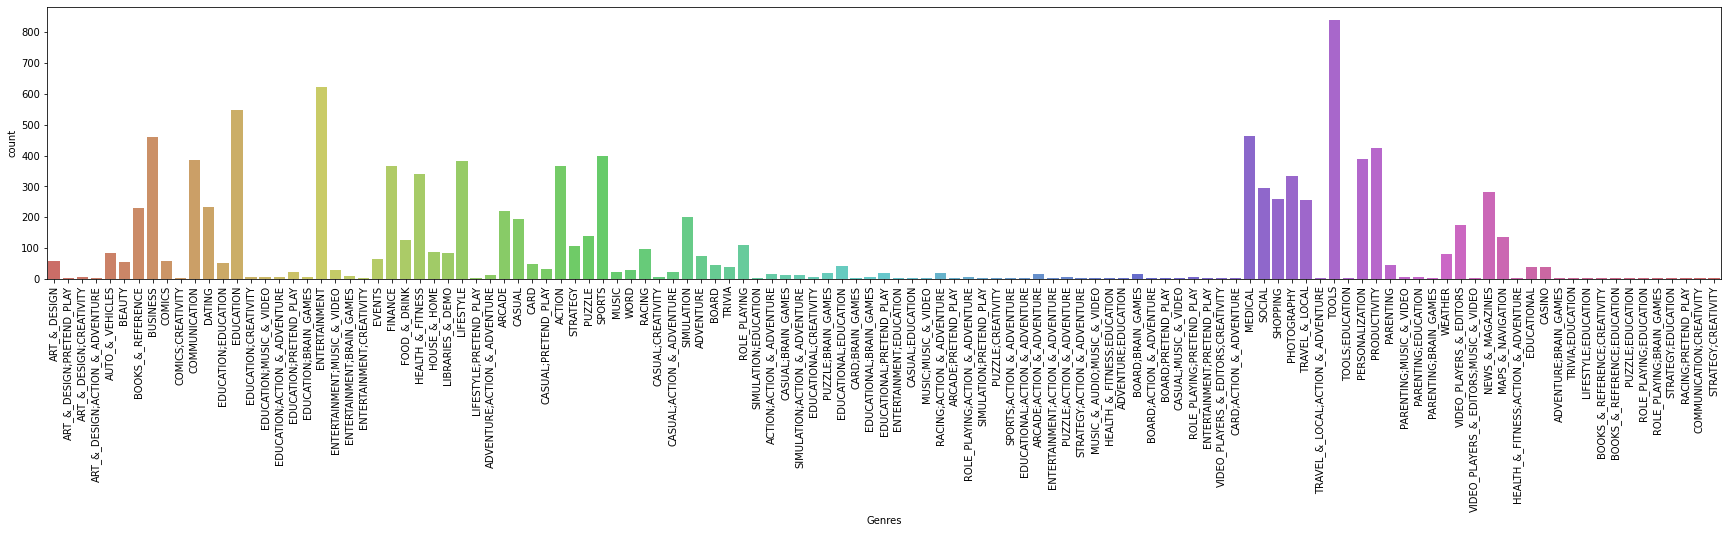

In [34]:
plt.figure(figsize=(30,5))
fig = sns.countplot(x=df['Genres'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

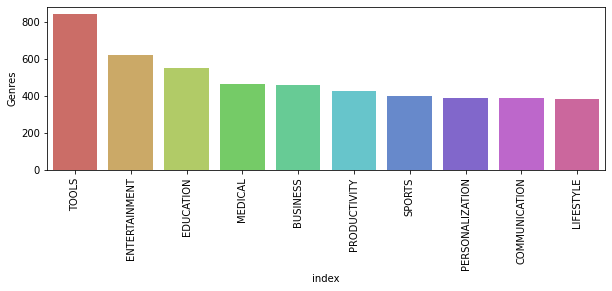

In [35]:
plt.figure(figsize=(10,3))
fig = sns.barplot(y=df['Genres'].value_counts().reset_index()[:10]['Genres'], x=df['Genres'].value_counts().reset_index()[:10]['index'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

In [39]:
sorted_by_rating = df.sort_values(by=['Rating'], ascending=False)
sorted_by_reviews = df.sort_values(by=['Reviews'], ascending=False)
sorted_by_price = df.sort_values(by=['Price'], ascending=False)

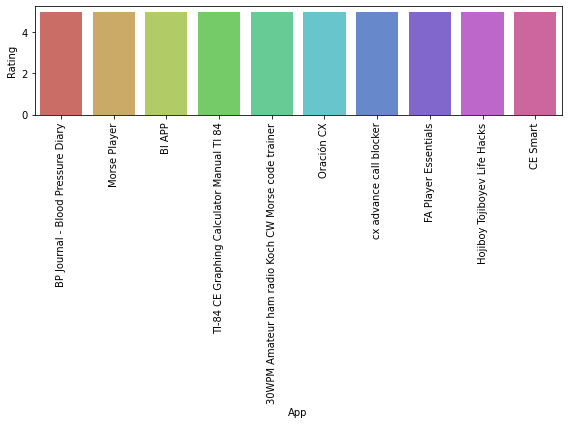

In [40]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_rating['App'][:10], y=sorted_by_rating['Rating'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

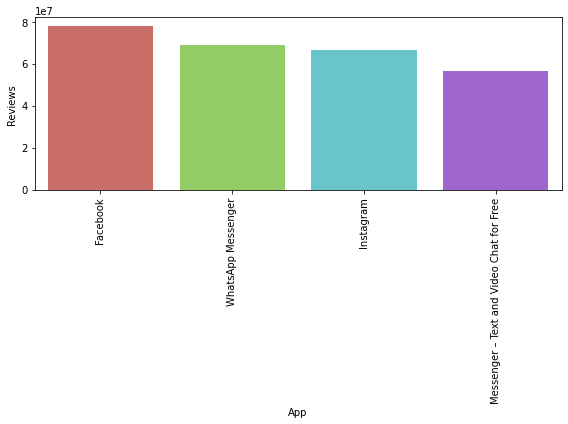

In [41]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_reviews['App'][:10], y=sorted_by_reviews['Reviews'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

c:\users\mujoo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mujoo\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


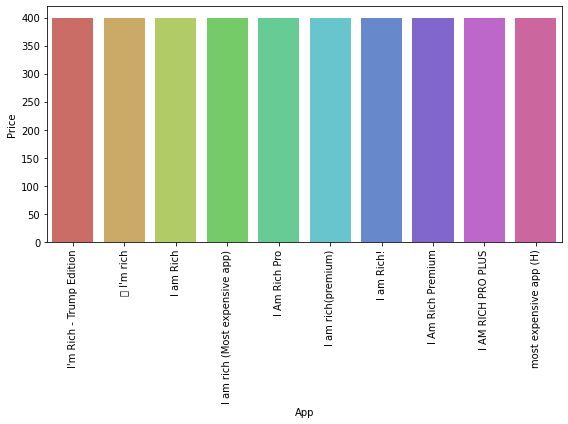

In [42]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_price['App'][:10], y=sorted_by_price['Price'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

Text(0, 0.5, 'Size')

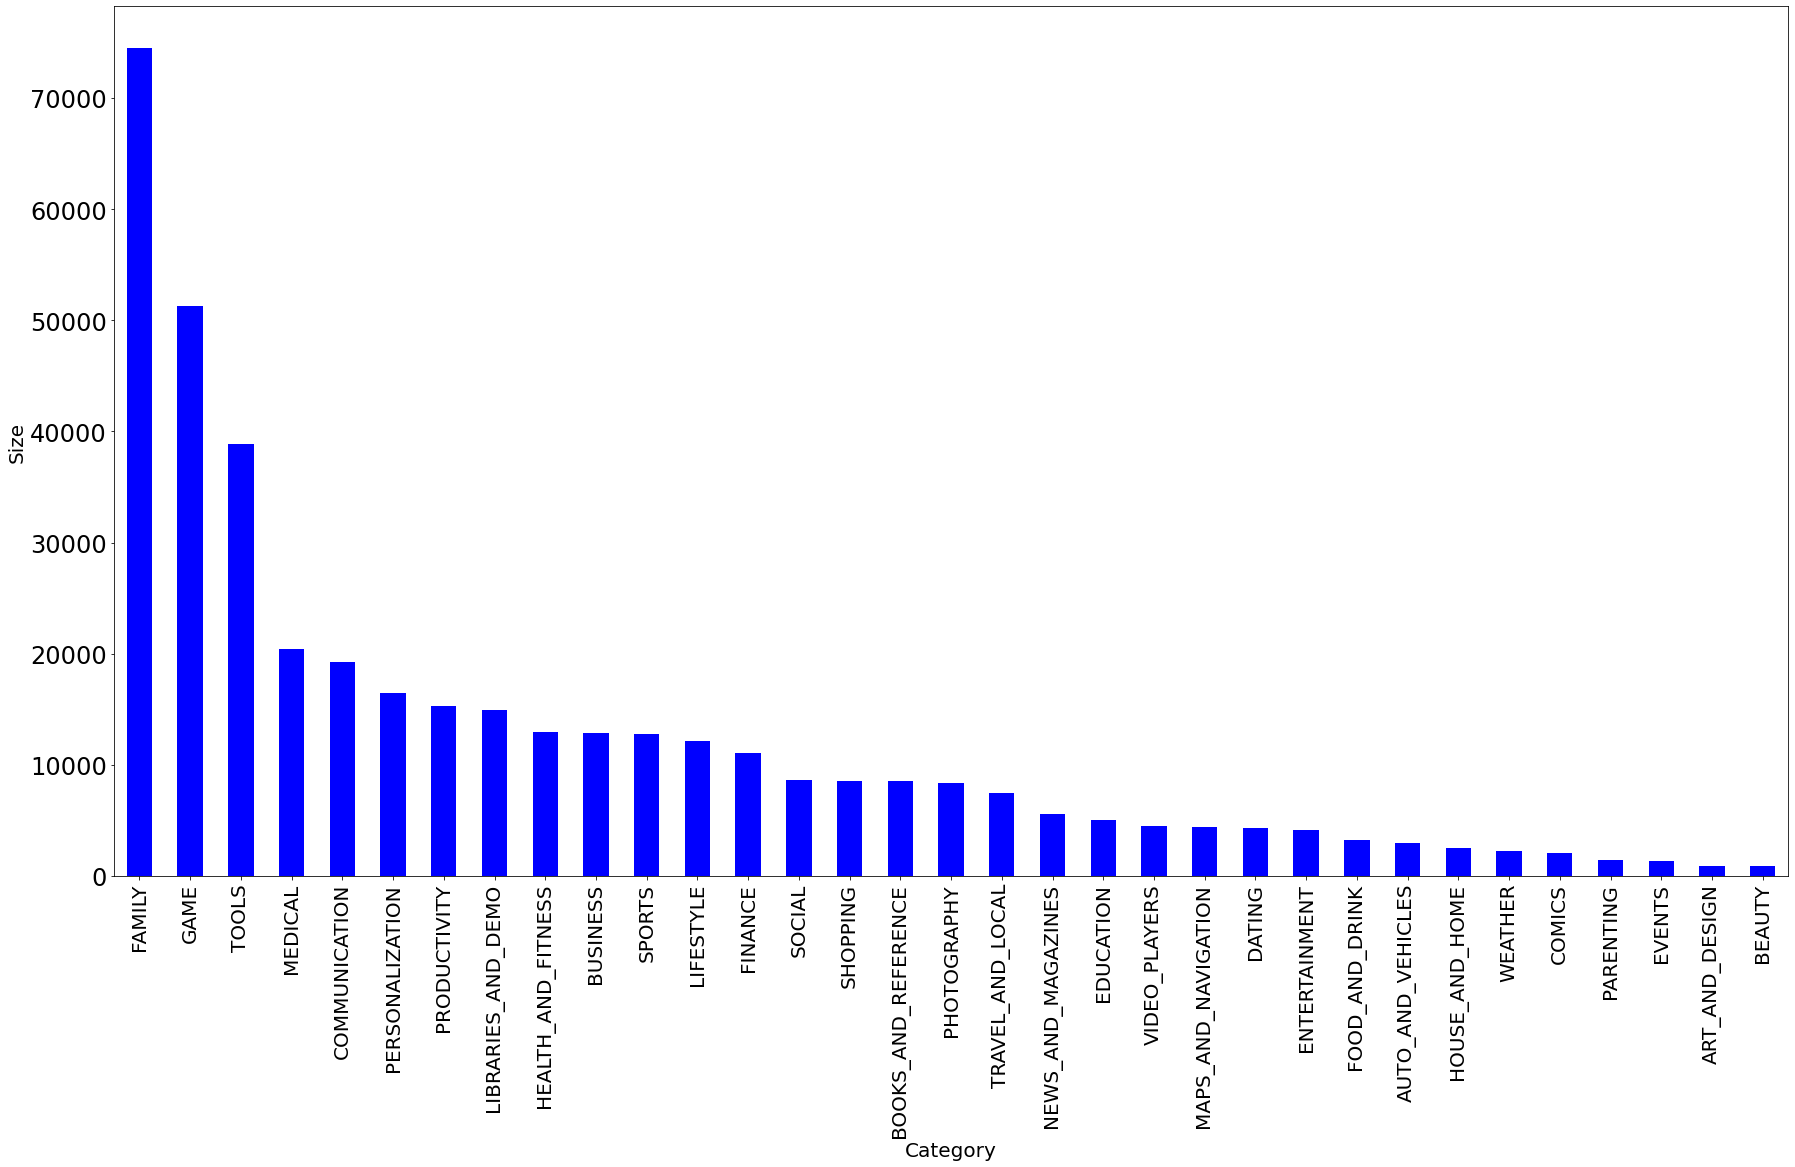

In [45]:
res = df.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

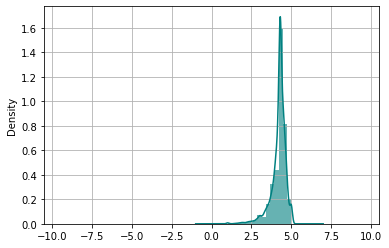

In [47]:
# hist plot for rating.......
xt=df['Rating'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Rating"].plot(kind='density', color='teal')

plt.grid()
plt.xlim(-10.5,10.5)
plt.show()


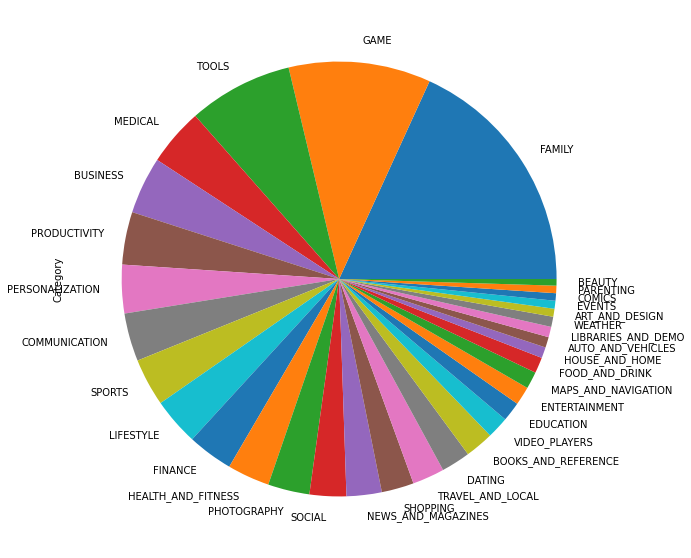

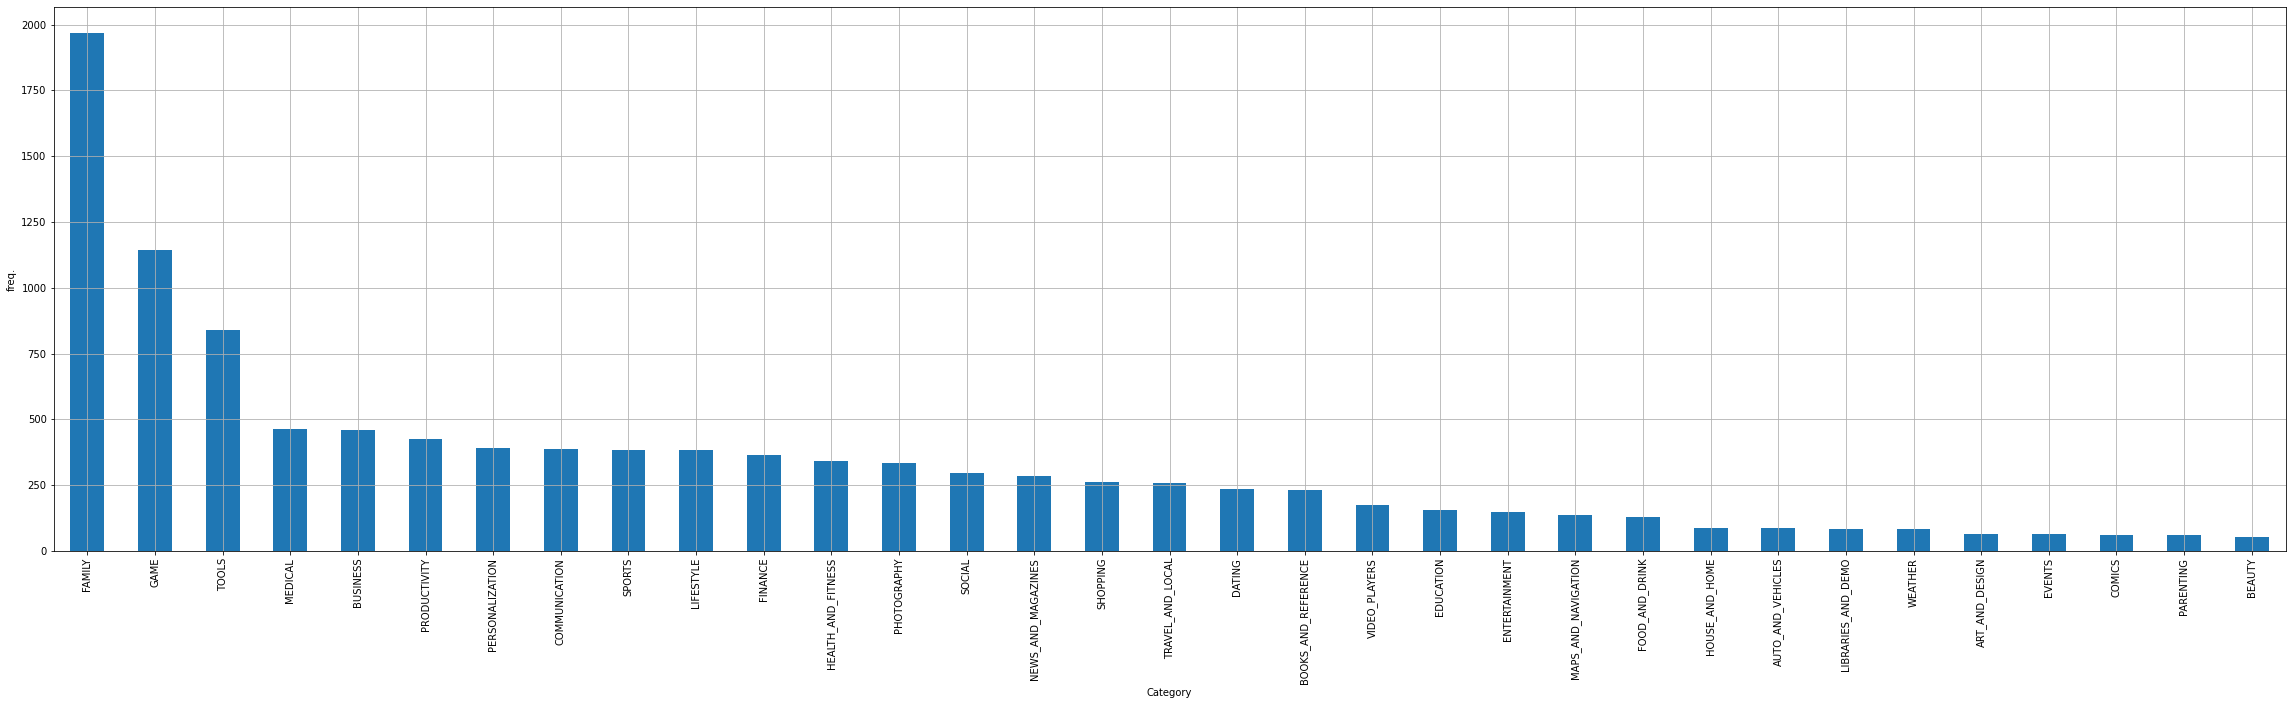

In [49]:
# most Most popular category
plt.figure(figsize=(40,10))
df['Category'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(40,10))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

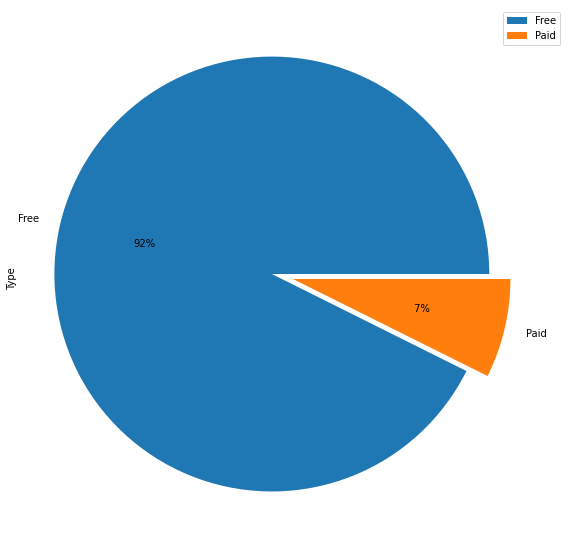

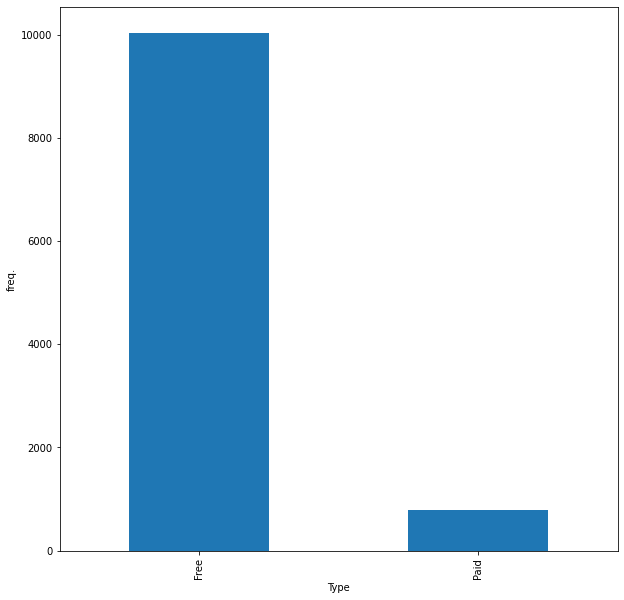

In [52]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
df['Type'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()

In [57]:
#APP WITH MAXIMUM SIZE
df[df['Size']==df['Size'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10786,Word Search Tab 1 FR,FAMILY,4.3,0,1020.0,50,Paid,1.04,everyone,PUZZLE,"February 6, 2012",1.1,3.0 and up


In [58]:
#APP WITH MAXIMUM INSTALLS
df[df['Installs']==df['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
151,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,36.947499,1000000000,Free,0.0,teen,BOOKS_&_REFERENCE,"August 3, 2018",Varies with device,Varies with device
334,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 1, 2018",Varies with device,Varies with device
335,WhatsApp Messenger,COMMUNICATION,4.4,69119316,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 3, 2018",Varies with device,Varies with device
337,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 1, 2018",Varies with device,Varies with device
339,Gmail,COMMUNICATION,4.3,4604324,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 2, 2018",Varies with device,Varies with device
340,Hangouts,COMMUNICATION,4.0,3419249,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"July 21, 2018",Varies with device,Varies with device
380,WhatsApp Messenger,COMMUNICATION,4.4,69119316,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 3, 2018",Varies with device,Varies with device
381,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 1, 2018",Varies with device,Varies with device
385,Hangouts,COMMUNICATION,4.0,3419433,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"July 21, 2018",Varies with device,Varies with device
390,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,36.947499,1000000000,Free,0.0,everyone,COMMUNICATION,"August 3, 2018",Varies with device,Varies with device


Text(0.5, 1.0, 'Most Popular Apps in Play Store')

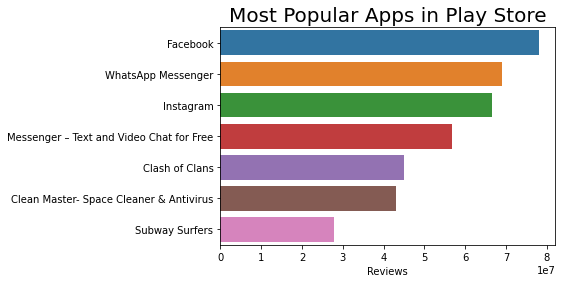

In [68]:
sorte = df.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorte )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Popular Apps in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

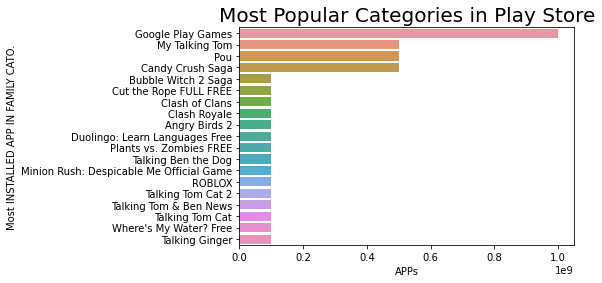

In [60]:
data_cat=df[df['Category']=='FAMILY'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATO.')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [62]:
df.to_csv('OutlierRemoved.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
